In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = 'abc.xlsx' 
data = pd.read_excel(file_path)


In [5]:
# Drop unnecessary columns (e.g., 'customer_id', 'phone_no')
data = data.drop(['customer_id', 'phone_no'], axis=1)

# Encode categorical columns (e.g., 'gender', 'multi_screen', 'mail_subscribed')
label_encoders = {}
for column in ['gender', 'multi_screen', 'mail_subscribed']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [7]:
# Define features (X) and target variable (y)
X = data.drop('churn', axis=1)
y = data['churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Initialize the Gradient Boosting Classifier model
gbm_clf = GradientBoostingClassifier(random_state=42)

# Train the classifier
gbm_clf.fit(X_train, y_train)

# Make predictions
y_pred = gbm_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.91
Precision: 0.61
Recall: 0.53
F1 Score: 0.57



Confusion Matrix:
[[337  16]
 [ 22  25]]


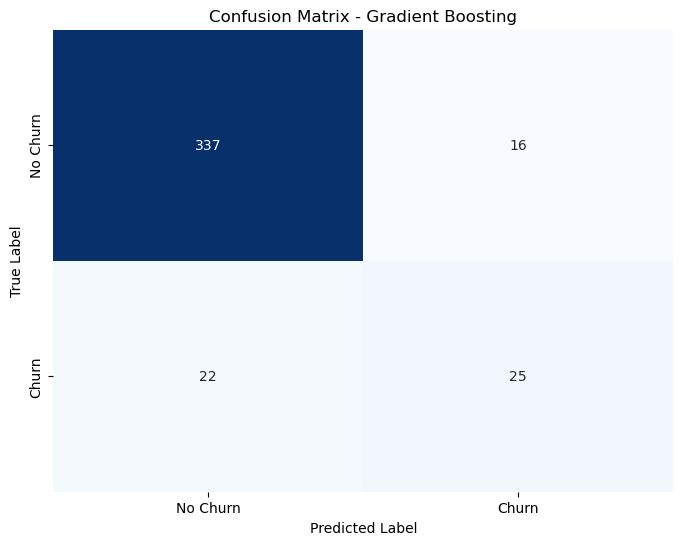

In [11]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
# Visualize the Confusion Matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [13]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       353
           1       0.61      0.53      0.57        47

    accuracy                           0.91       400
   macro avg       0.77      0.74      0.76       400
weighted avg       0.90      0.91      0.90       400

